In [1]:
import matplotlib.pyplot as plt # import needed packages
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = 12,6  
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import pandas as pd
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data

In [22]:
# import dataset
heat_obs_2000 = xr.open_dataset("/home/tu.temple.edu/tun27673/Class/Ellinger_final_project_G2/data/heat_content_anomaly_0-2000_yearly.nc", decode_times=False)
heat_obs_700 = xr.open_dataset("/home/tu.temple.edu/tun27673/Class/Ellinger_final_project_G2/data/heat_content_anomaly_0-700_yearly.nc", decode_times=False)

In [34]:
# create time axis to data and assign time time to each dataset

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
time_axis_2005_2022 = pd.date_range("2005","2023", freq="Y")

heat_700 = heat_obs_700.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})
heat_2000 = heat_obs_2000.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2022})

heat_content_2005_2022 = heat_2000.h18_hc
heat_content_1955_2022 = heat_700.h18_hc

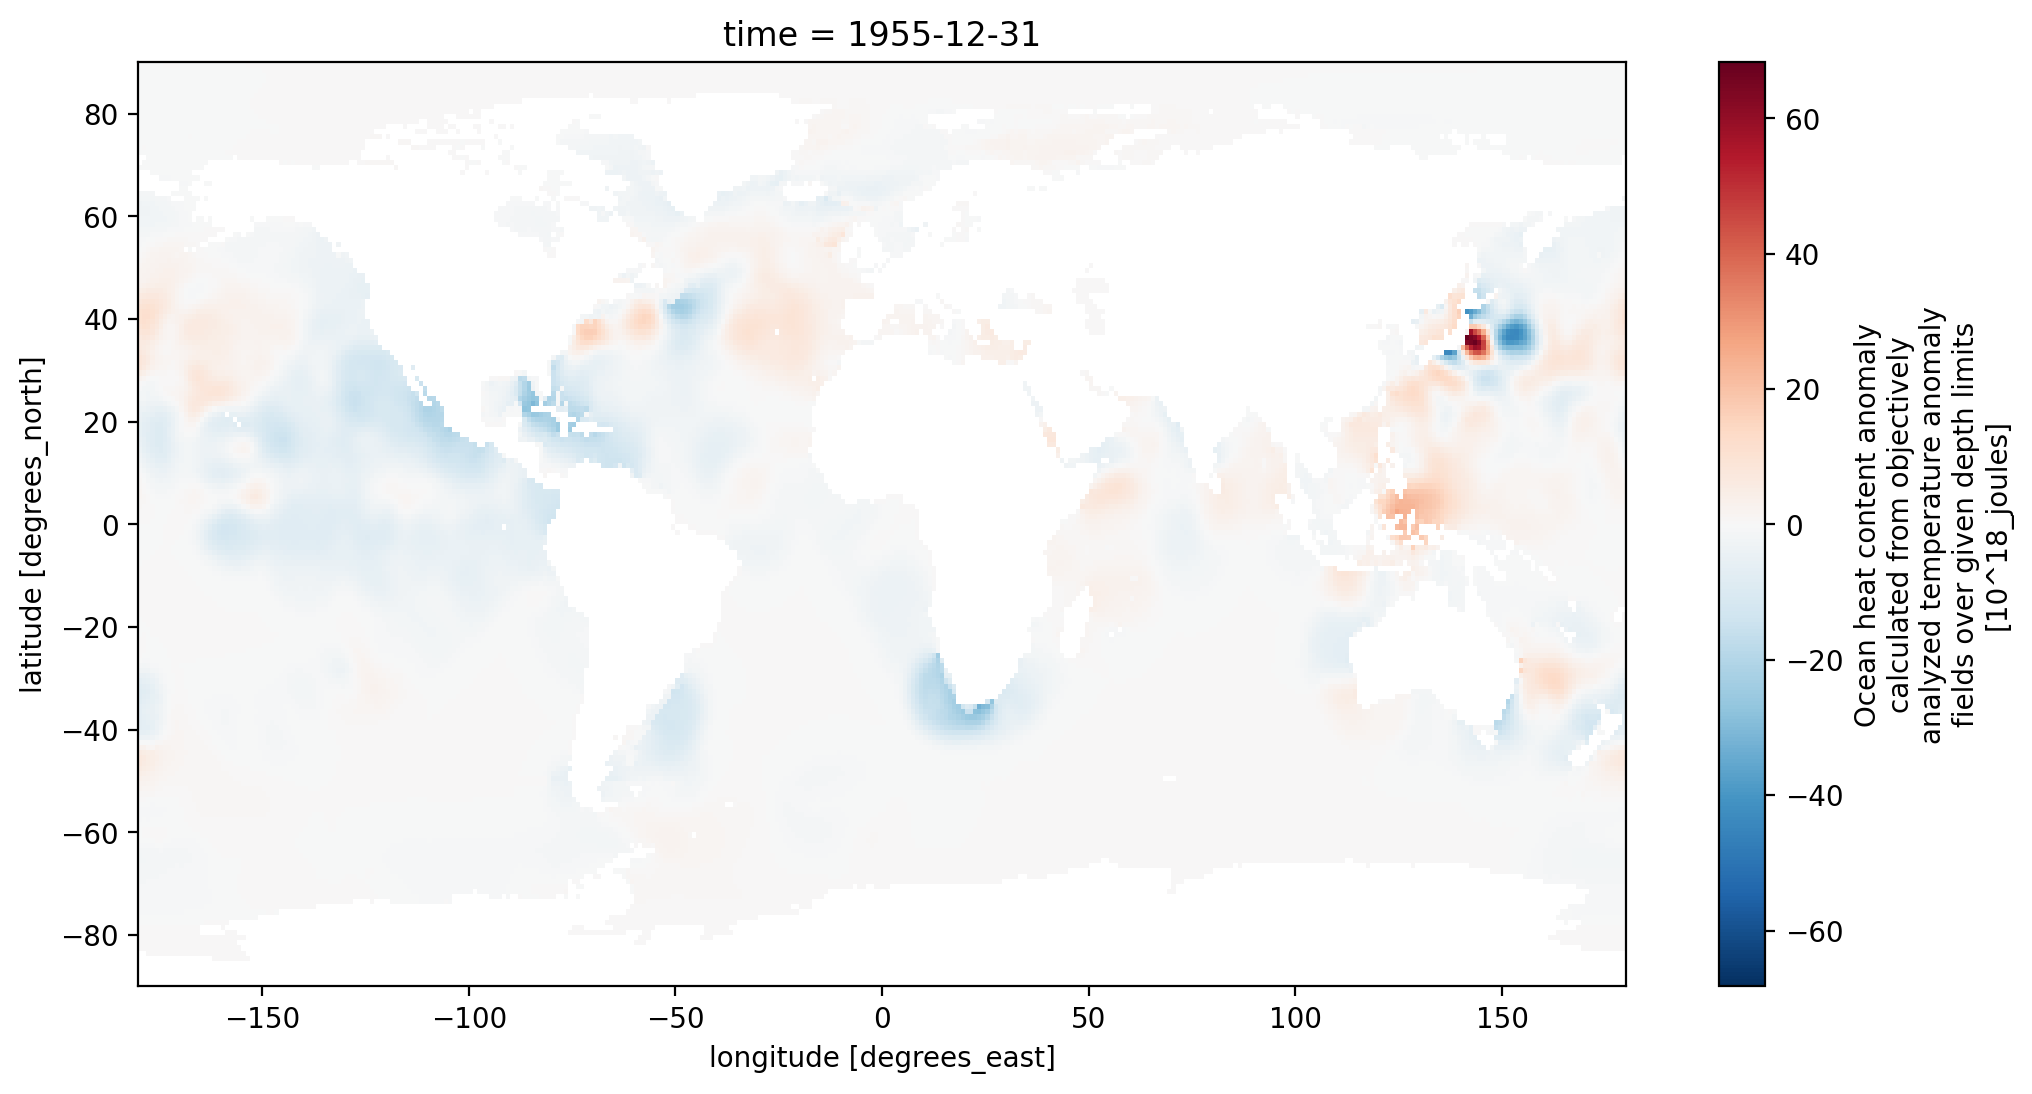

In [36]:
heat_content_1955_2022.isel(time=0).plot() # Data is automatically in difference since 1955. 

Text(0.5, 1.0, 'Heat Content Anomoly 2005-2022, Averaged from 0-2000m, 10^18 J')

<Figure size 1200x800 with 0 Axes>

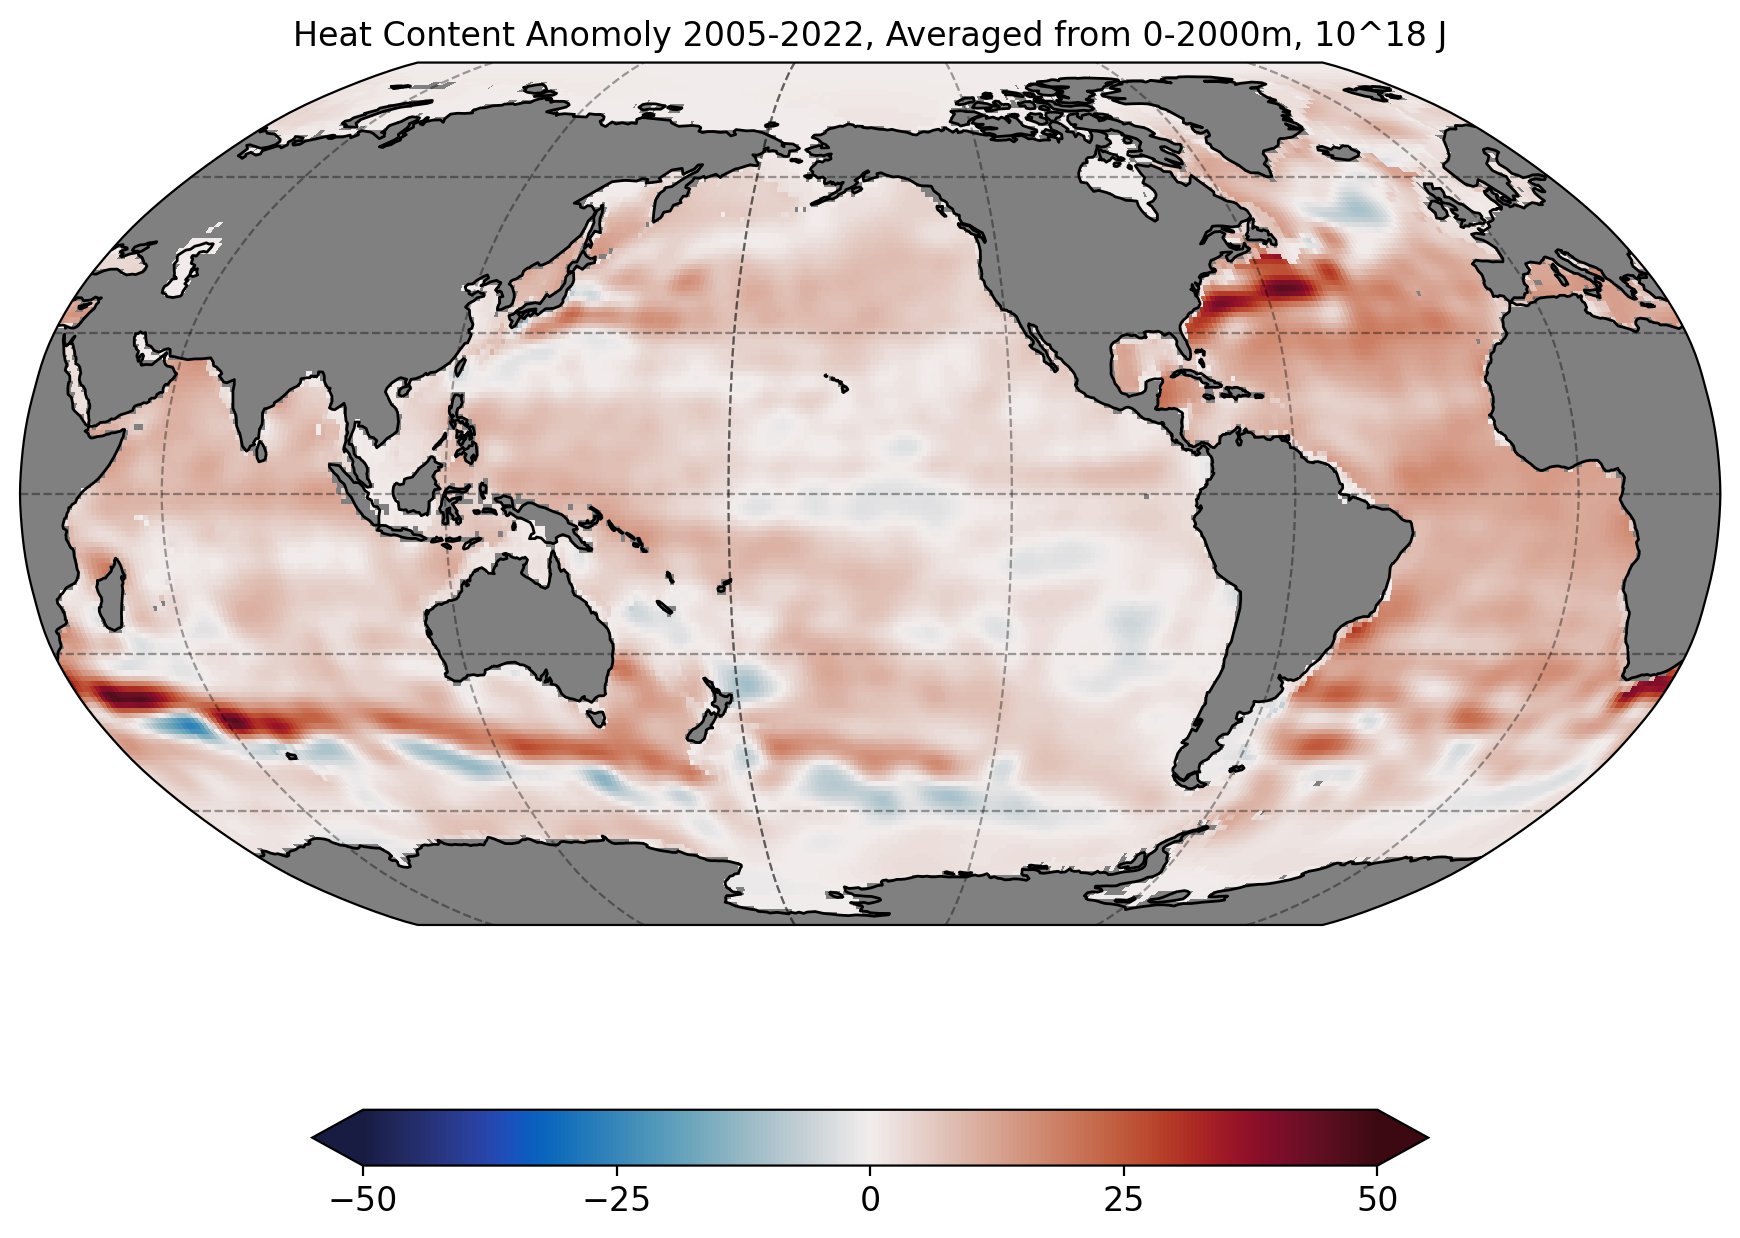

In [37]:
subplot_kws=dict(projection=ccrs.Robinson(),
                 )

plt.figure(figsize=[12,8])

subplot_kws=dict(projection=ccrs.Robinson(central_longitude=-150),
                 facecolor='grey')

plt.figure(figsize=[12,8])
p = heat_content_2005_2022.mean(dim='time').plot(x='lon', y='lat',
                        vmin=-50,vmax=50,
                      cmap=cmocean.cm.balance,
                      subplot_kws=subplot_kws,
                      transform=ccrs.PlateCarree(),
                      add_colorbar=False)

p.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p.axes.gridlines(color='black', alpha=0.2, linestyle='--')

# add a seperate colorbar
cb = plt.colorbar(p, ticks=[ -50, -25, 0, 25, 50],shrink=0.6,extend='both', orientation = "horizontal")
cb.ax.tick_params(labelsize=12)

p.axes.coastlines()
plt.title("Heat Content Anomoly 2005-2022, Averaged from 0-2000m, 10^18 J")

Text(0.5, 1.0, 'Heat Content Anomoly 1955-2022, averaged from 0-700m, 10^18 J')

<Figure size 1200x800 with 0 Axes>

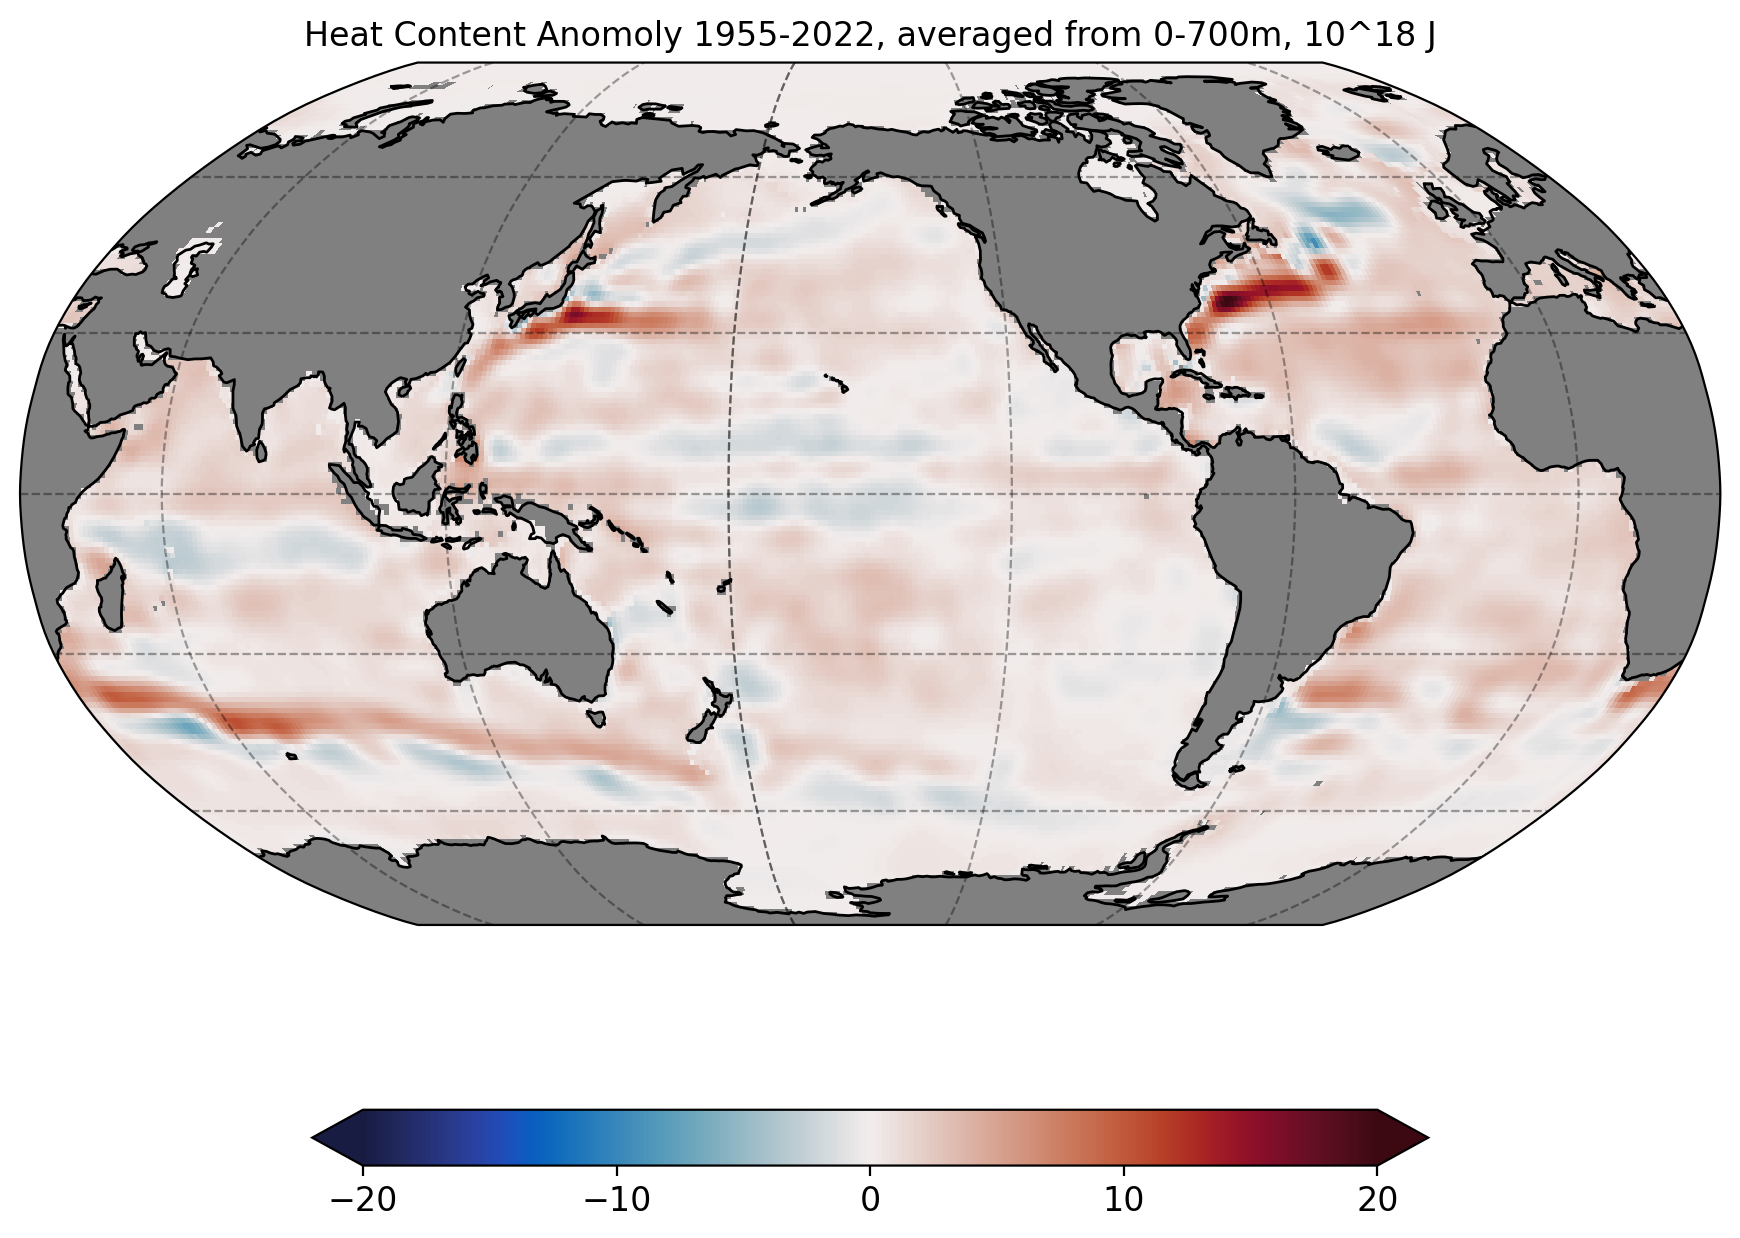

In [38]:
subplot_kws=dict(projection=ccrs.Robinson(),
                 )

plt.figure(figsize=[12,8])

subplot_kws=dict(projection=ccrs.Robinson(central_longitude=-150),
                 facecolor='grey')

plt.figure(figsize=[12,8])
p = heat_content_1955_2022.mean(dim='time').plot(x='lon', y='lat', 
                        vmin=-20,vmax=20,
                      cmap=cmocean.cm.balance,
                      subplot_kws=subplot_kws,
                      transform=ccrs.PlateCarree(),
                      add_colorbar=False)

p.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p.axes.gridlines(color='black', alpha=0.2, linestyle='--')

# add a seperate colorbar
cb = plt.colorbar(p, ticks=[ -20, -10, 0, 10, 20],shrink=0.6,extend='both', orientation = "horizontal")
cb.ax.tick_params(labelsize=12)

p.axes.coastlines()
plt.title("Heat Content Anomoly 1955-2022, averaged from 0-700m, 10^18 J")